In [20]:
import pandas as pd 

datos = pd.read_csv("housing.csv")

In [21]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

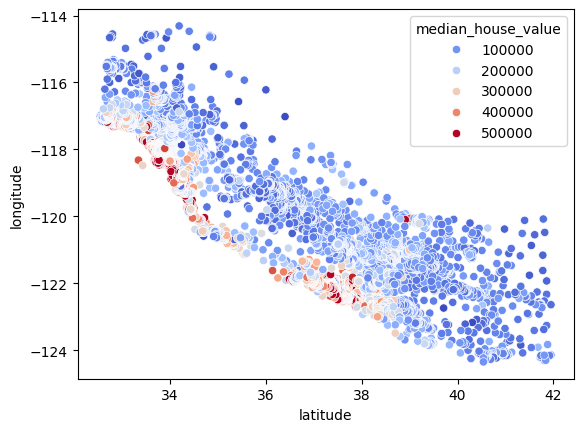

In [22]:
import seaborn as sb
sb.scatterplot(x='latitude',y='longitude', data=datos, hue='median_house_value', palette="coolwarm")

TypeError: cannot convert the series to <class 'float'>

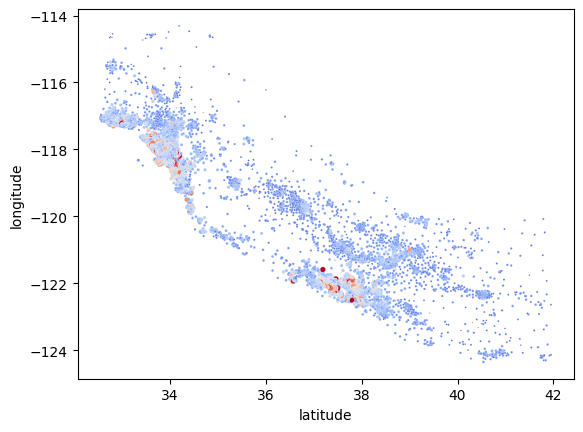

In [23]:
sb.scatterplot(x='latitude',y='longitude', data=datos, hue='median_income', palette="coolwarm", s=datos["median_income"])

In [ ]:
datos.loc[: ,["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [25]:
from sklearn.cluster import KMeans


x = datos.loc[: ,["latitude", "longitude", "median_income"]] #Separar los datos necesarios
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(x)


c:\Users\eobga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
predicciones.shape

(20640,)

In [27]:
x["segmento_economico"] = predicciones

In [28]:
x

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,3
...,...,...,...,...
20635,39.48,-121.09,1.5603,3
20636,39.49,-121.21,2.5568,3
20637,39.43,-121.22,1.7000,3
20638,39.43,-121.32,1.8672,3


In [29]:
x['segmento_economico'].value_counts() #Observando vemos que el 0 son las personas con mayor ingreso.

segmento_economico
2    6995
3    4851
0    3856
1    2796
5    1683
4     459
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

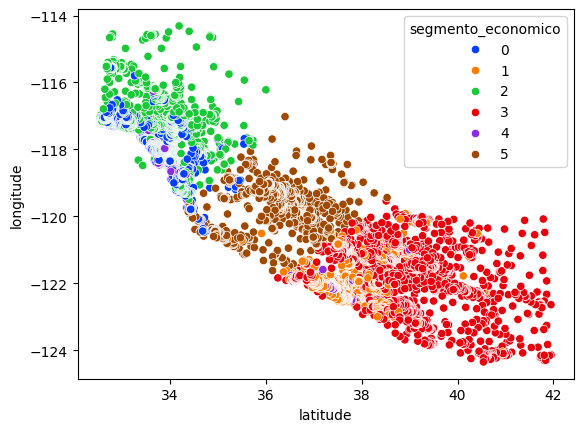

In [31]:
sb.scatterplot(x='latitude',y='longitude', data=x, hue='segmento_economico', palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

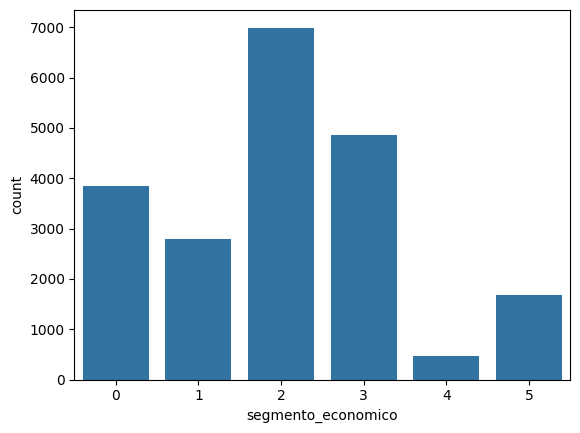

In [32]:
sb.countplot(x='segmento_economico',data=x)

In [33]:
x.groupby(["segmento_economico"])['median_income'].mean()

segmento_economico
0     5.510988
1     5.504178
2     2.870170
3     2.815144
4    10.946702
5     2.669611
Name: median_income, dtype: float64